In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df =pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
df.duplicated('CustomerId').sum()

0

In [ ]:
df =df.set_index('CustomerId')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [ ]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Geography']=le.fit_transform(df.Geography)

In [ ]:
df['Geography'][:5]

CustomerId
15634602    0
15647311    2
15619304    0
15701354    0
15737888    2
Name: Geography, dtype: int64

France = 0, Spain = 2 , Germany = 3

In [ ]:
df.replace({'Gender':{'Female':1,'Male':0}},inplace=True)
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,2,1,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.replace({'Num Of Products':{1:0,2:1,3:2,4:3}},inplace=True)

In [ ]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [ ]:
df['zero balance'] = np.where(df['Balance']>0,1,0)
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,zero balance
CustomerId,,,,,,,,,,,,,
15634602,Hargrave,619,0,1,42,2,0.00,0,1,1,101348.88,1,0
15647311,Hill,608,2,1,41,1,83807.86,0,0,1,112542.58,0,1
15619304,Onio,502,0,1,42,8,159660.80,2,1,0,113931.57,1,1
15701354,Boni,699,0,1,39,1,0.00,1,0,0,93826.63,0,0
15737888,Mitchell,850,2,1,43,2,125510.82,0,1,1,79084.10,0,1


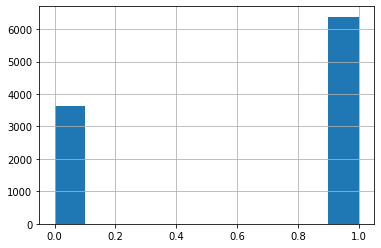

In [ ]:
df['zero balance'].hist()

In [ ]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             4204         4204    4204  4204    4204     4204   
      1             1695         1695    1695  1695    1695     1695   
      2             2064         2064    2064  2064    2064     2064   
1     0              810          810     810   810     810      810   
      1              814          814     814   814     814      814   
      2              413          413     413   413     413      413   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     4204             4204              4204   
      1                     1695             1695              1695   
      2                     2064             2064              2064   
1     0                      810              810               810   
      1                      814              814               814   
      2                      413              413               413   

                 Estimated Salary  zero balance  
Churn Geography                                  
0     0                      4204          4204  
      1                      1695          1695  
      2                      2064          2064  
1     0                       810           810  
      1                       814           814  
      2                       413           413

In [ ]:
X = df.drop(['Churn','Surname'],axis = 1)

In [ ]:
y = df['Churn']

In [ ]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

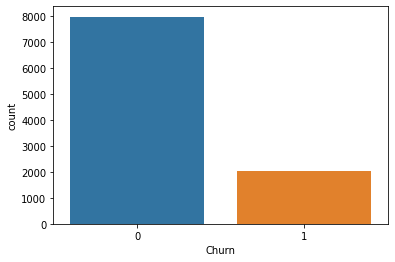

In [ ]:
sns.countplot(x = 'Churn',data =df)

Random undersampling for imbalance classes

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=2529)
X_rus,y_rus = rus.fit_resample(X,y)

X_rus.shape,y_rus.shape,X.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [ ]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [ ]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=2529)
X_ros,y_ros = ros.fit_resample(X,y)

X_ros.shape,y_ros.shape,X.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [ ]:
y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

#split original dataset
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state =2529)

#split random under sample
xtrain_us,xtest_us,ytrain_us,ytest_us = train_test_split(X_rus,y_rus,test_size=0.2,random_state =2529)

#split random over sample
xtrain_os,xtest_os,ytrain_os,ytest_os = train_test_split(X_ros,y_ros,test_size=0.2,random_state =2529)

In [ ]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'zero balance'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
xtrain[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(xtrain[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']])
xtest[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(xtest[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']])

#random under sample
xtrain_us[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(xtrain_us[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']])
xtest_us[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(xtest_us[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']])

#random over sample
xtrain_os[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(xtrain_os[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']])
xtest_os[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(xtest_os[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']])


In [ ]:
from sklearn.svm import SVC

svc =SVC()
svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(ytest,ypred)

array([[1579,   24],
       [ 274,  123]])

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1603
           1       0.84      0.31      0.45       397

    accuracy                           0.85      2000
   macro avg       0.84      0.65      0.68      2000
weighted avg       0.85      0.85      0.82      2000



In [ ]:
from sklearn.model_selection import GridSearchCV
para={ 'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}

cv = GridSearchCV(svc,param_grid = para,refit=True,verbose = 2,cv =3)
cv.fit(xtrain,ytrain)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.0s
[CV] END ....C=1, class_weight=balanced, gamma

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
cv.best_params_

{'C': 10, 'class_weight': 'balanced', 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
ypred = cv.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1603
           1       0.53      0.45      0.49       397

    accuracy                           0.81      2000
   macro avg       0.70      0.67      0.69      2000
weighted avg       0.80      0.81      0.81      2000



In [ ]:
svc.fit(xtrain_us,ytrain_us)
ypred_us = svc.predict(xtest_us)
print(classification_report(ytest_us,ypred_us))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       417
           1       0.74      0.70      0.72       398

    accuracy                           0.73       815
   macro avg       0.74      0.73      0.73       815
weighted avg       0.74      0.73      0.73       815



In [ ]:
from sklearn.model_selection import GridSearchCV
para={ 'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}

cv = GridSearchCV(SVC(),param_grid = para,refit=True,verbose = 2,cv =3)
cv.fit(xtrain_us,ytrain_us)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END ....C=1, class_weight=balanced, gamma

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
cv.best_params_

{'C': 10, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
ypred_us = cv.predict(xtest_us)
print(classification_report(ytest_us,ypred_us))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       417
           1       0.74      0.70      0.72       398

    accuracy                           0.74       815
   macro avg       0.74      0.74      0.74       815
weighted avg       0.74      0.74      0.74       815



In [ ]:
svc.fit(xtrain_os,ytrain_os)
ypred_os = svc.predict(xtest_os)
print(classification_report(ytest_os,ypred_os))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1604
           1       0.80      0.78      0.79      1582

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186



In [ ]:
from sklearn.model_selection import GridSearchCV
para={ 'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}

cv = GridSearchCV(SVC(),param_grid = para,refit=True,verbose = 2,cv =3)
cv.fit(xtrain_os,ytrain_os)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=  17.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=  11.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   8.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   6.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   6.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   6.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   6.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   6.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   6.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.1s
[CV] END ....C=1, class_weight=balanced, gamma

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
cv.best_params_

{'C': 10, 'class_weight': 'balanced', 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
ypred_os = cv.predict(xtest_os)
print(classification_report(ytest_os,ypred_os))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1604
           1       0.90      0.98      0.93      1582

    accuracy                           0.93      3186
   macro avg       0.94      0.93      0.93      3186
weighted avg       0.94      0.93      0.93      3186

